In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

In [2]:
def bag_binary(row):
  if row['bag_cnn_probability'] > 0.5:
    return 1.0
  else:
    return 0.0

In [3]:
def Process_table(path):
  tbl = pd.read_csv(path)

  tbl_2 = pd.read_csv('./tables/testing_example.csv')

  df = pd.merge(tbl,tbl_2,on='instance_name')

  df['bag_binary'] = df.apply (lambda row: bag_binary(row), axis=1)

  bags = np.unique(df['bag_name_x'].to_list())

  return df, bags

In [4]:
def Instance_label(df, bags):
  instance_binary = []
  for bb in bags:
    try:
      sub_df = df.loc[df['bag_name_x'] == bb]
      if sub_df['bag_binary'].to_list()[0] == 0:
        for ss in range(len(sub_df)):
          instance_binary.append(0)
      elif sub_df['bag_binary'].to_list()[0] == 1:
        for ss in range(len(sub_df)):
          if sub_df['cnn_prediction'].to_list()[ss] > 1.0/57:
            instance_binary.append(1)
          else:
            instance_binary.append(0)
      else:
        print(bb)
    except:
        print(bb)
  df['instance_binary'] = instance_binary
  return df

In [5]:
def plot_att(S_pred_09, S_pred_sa, S_pred_baseline, y_label):
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))
    thr = 1.0 / len(S_pred_sa)
    ax.plot(S_pred_09, 'o-', label='SA, {} = 0.9'.format(r'$\alpha$'))
    ax.plot(S_pred_sa, 'o-', label='SA, {} = 0.5'.format(r'$\alpha$'))
    ax.plot(S_pred_baseline, 'o-', label='Baseline, {} = 0'.format(r'$\alpha$'))
    ax.plot([thr] * len(S_pred_sa), 'r--', label='Threshold')
    ax.fill_between(np.arange(len(S_pred_sa)), 0, S_pred_09, alpha=0.2)
    ax.fill_between(np.arange(len(S_pred_sa)), 0, S_pred_sa, alpha=0.2)
    ax.fill_between(np.arange(len(S_pred_sa)), 0, S_pred_baseline, alpha=0.2)
    ax.fill_between(np.arange(len(S_pred_sa)), 0, y_label, alpha=0.2, step='pre', label='Positive instances')
    ax.set_xlabel('Instance index', fontsize=18)
    ax.set_ylabel('Attention score', fontsize=18)
    ax.set_ylim(0, 0.2)
    ax.xaxis.set_tick_params(labelsize=15)
    ax.yaxis.set_tick_params(labelsize=15)
    ax.legend(prop={'size': 18})
    return fig

In [12]:
# Process the tables
df1, bags1 = Process_table('./tables/att_0_9.csv')
df1 = Instance_label(df1, bags1)

# evaluate the performance at slice level
target = df1['instance_label']
preds_value = df1['instance_binary']
print('Accuracy:', accuracy_score(target, preds_value))
print('Precision:', precision_score(target, preds_value))
print('Recall:', recall_score(target, preds_value))
print('F1 score:', f1_score(target, preds_value))

In [13]:
# Process the tables
df2, bags2 = Process_table('./tables/att_0_5.csv')
df2 = Instance_label(df2, bags2)

# evaluate the performance at slice level
target = df2['instance_label']
preds_value = df2['instance_binary']
print('Accuracy:', accuracy_score(target, preds_value))
print('Precision:', precision_score(target, preds_value))
print('Recall:', recall_score(target, preds_value))
print('F1 score:', f1_score(target, preds_value))

In [14]:
# Process the tables
df3, bags3 = Process_table('./tables/att_baseline.csv')
df3 = Instance_label(df3, bags3)

# evaluate the performance at slice level
target = df3['instance_label']
preds_value = df3['instance_binary']
print('Accuracy:', accuracy_score(target, preds_value))
print('Precision:', precision_score(target, preds_value))
print('Recall:', recall_score(target, preds_value))
print('F1 score:', f1_score(target, preds_value))

In [15]:
# Plot the figure to show the smoothness
# example: ID_fffdba8d7b
def Plot_scan(id, sa_0_9, sa_0_5, non_sa_baseline):
  df1_ex = sa_0_9.loc[sa_0_9['bag_name_x'] == id]
  df2_ex = sa_0_5.loc[sa_0_5['bag_name_x'] == id]
  df3_ex = non_sa_baseline.loc[non_sa_baseline['bag_name_x'] == id]

  y_label = df1_ex['instance_label'].to_list()
  S_pred_09 = df2_ex['cnn_prediction'].to_list()
  S_pred_09 = [float(i)/sum(S_pred_09) for i in S_pred_09]
  S_pred_sa = df1_ex['cnn_prediction'].to_list()
  S_pred_sa = [float(i)/sum(S_pred_sa) for i in S_pred_sa]
  S_pred_baseline = df3_ex['cnn_prediction'].to_list()
  S_pred_baseline = [float(i)/sum(S_pred_baseline) for i in S_pred_baseline]

  plot_att(S_pred_09, S_pred_sa, S_pred_baseline, y_label)

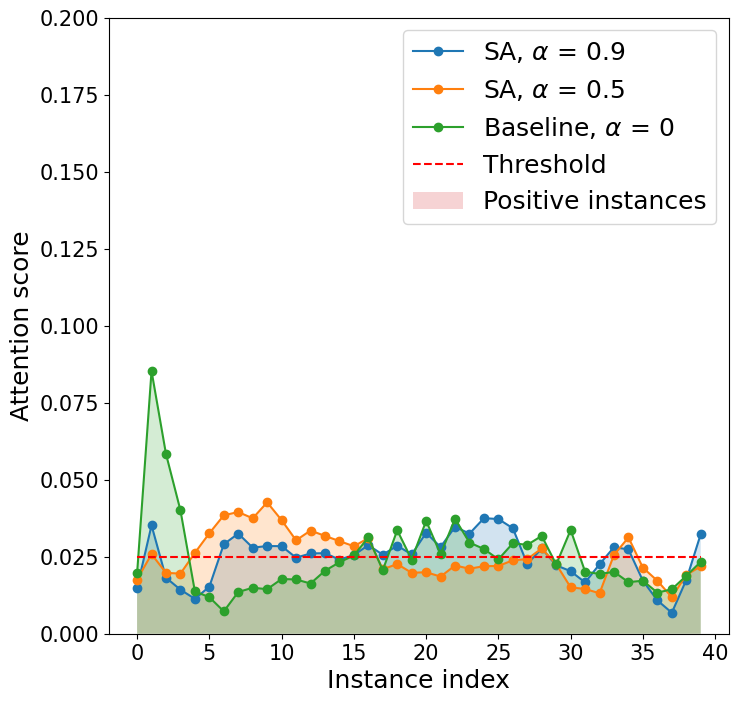

In [10]:
# non-ich scan
Plot_scan('ID_00047d6503', df1, df2, df3)


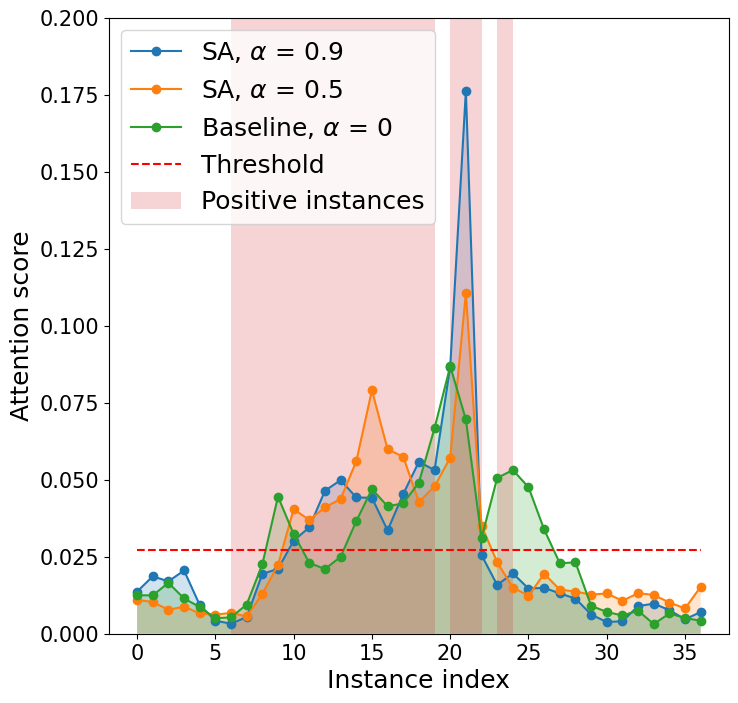

In [11]:
# ich scan
Plot_scan('ID_fdf596e74f', df1, df2, df3)